In [5]:
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [6]:
resume=pd.read_csv('resume_screening.csv')
resume

,Resume_ID,Name,Skills,Experience (Years),Education,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,AI Researcher,Hire,104895,8,100
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Data Scientist,Hire,113002,1,100
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Cybersecurity Analyst,Hire,71766,7,70
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AI Researcher,Hire,46848,0,95
4,5,Julie Hill,"SQL, React, Java",4,PhD,Software Engineer,Hire,87441,9,100
...,...,...,...,...,...,...,...,...,...,...
995,996,Brenda Williams,"Cybersecurity, Linux, Ethical Hacking",0,B.Sc,Cybersecurity Analyst,Reject,114364,9,60
996,997,Colleen Hicks,"Deep Learning, Machine Learning",0,MBA,Data Scientist,Reject,103294,5,45
997,998,Michelle Molina,"TensorFlow, NLP",0,B.Tech,AI Researcher,Hire,113855,9,65
998,999,Danielle Horn,"Linux, Networking, Cybersecurity, Ethical Hacking",8,PhD,Cybersecurity Analyst,Hire,83146,10,100


In [7]:
resume=pd.read_csv('resume_clean.csv')
resume

,Name,Skills,Job Role
0,Ashley Ali,TensorFlow NLP Pytorch,AI Researcher
1,Wesley Roman,Deep Learning Machine Learning Python SQL,Data Scientist
2,Corey Sanchez,Ethical Hacking Cybersecurity Linux,Cybersecurity Analyst
3,Elizabeth Carney,Python Pytorch TensorFlow,AI Researcher
4,Julie Hill,SQL React Java,Software Engineer
...,...,...,...
995,Brenda Williams,Cybersecurity Linux Ethical Hacking,Cybersecurity Analyst
996,Colleen Hicks,Deep Learning Machine Learning,Data Scientist
997,Michelle Molina,TensorFlow NLP,AI Researcher
998,Danielle Horn,Linux Networking Cybersecurity Ethical Hacking,Cybersecurity Analyst


In [9]:


# Remove commas from every row in the 'skills' column
resume['Skills'] = resume['Skills'].str.replace(",", " ", regex=True)



In [10]:
# Save cleaned dataset
resume.to_csv("resume_clean.csv", index=False)

In [11]:
print(resume.head())

               Name                                        Skills  \
0        Ashley Ali                      TensorFlow  NLP  Pytorch   
1      Wesley Roman  Deep Learning  Machine Learning  Python  SQL   
2     Corey Sanchez         Ethical Hacking  Cybersecurity  Linux   
3  Elizabeth Carney                   Python  Pytorch  TensorFlow   
4        Julie Hill                              SQL  React  Java   

                Job Role  
0          AI Researcher  
1         Data Scientist  
2  Cybersecurity Analyst  
3          AI Researcher  
4      Software Engineer  


In [12]:
print(resume['Job Role'].value_counts())


Job Role
AI Researcher            257
Data Scientist           255
Cybersecurity Analyst    255
Software Engineer        233
Name: count, dtype: int64


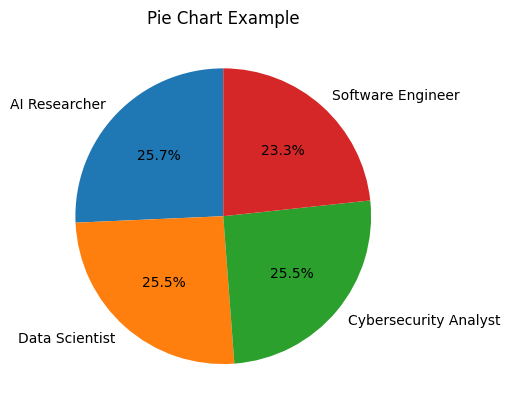

In [13]:
Job_Role = {
    "AI Researcher": 257,
    "Data Scientist": 255,
    "Cybersecurity Analyst": 255,
    "Software Engineer": 233
}
# Plot pie chart
plt.pie(Job_Role.values(), labels=Job_Role.keys(), autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart Example")
plt.show()

In [14]:
resume.isnull().sum()

Name        0
Skills      0
Job Role    0
dtype: int64

In [15]:
X=resume['Skills']
y=resume['Job Role']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train

29                                           SQL  Python
535                                           React  SQL
695    Cybersecurity  Linux  Ethical Hacking  Networking
557              Machine Learning  Deep Learning  Python
836                                Deep Learning  Python
                             ...                        
106                              NLP  Python  TensorFlow
270                        Machine Learning  SQL  Python
860                                      Pytorch  Python
435                           Python  Deep Learning  SQL
102                          Ethical Hacking  Networking
Name: Skills, Length: 800, dtype: object

In [17]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [18]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(resume['Skills'])

In [19]:
print(X.shape)


(1000, 15)


In [20]:
# Target column
y = resume["Job Role"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [22]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[52  0  0  0]
 [ 0 51  0  0]
 [ 0  0 45  0]
 [ 0  0  0 52]]


In [23]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
                        precision    recall  f1-score   support

        AI Researcher       1.00      1.00      1.00        52
Cybersecurity Analyst       1.00      1.00      1.00        51
       Data Scientist       1.00      1.00      1.00        45
    Software Engineer       1.00      1.00      1.00        52

             accuracy                           1.00       200
            macro avg       1.00      1.00      1.00       200
         weighted avg       1.00      1.00      1.00       200



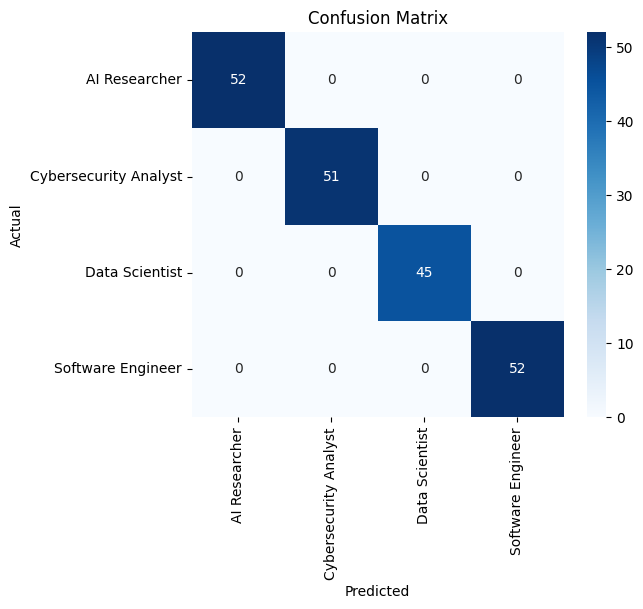

In [24]:
# Suppose you already have y_test (true labels) and y_pred (predicted labels)
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf.classes_,
            yticklabels=rf.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [25]:
# clean resume
import re

def clean_resume(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove emails
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove phone numbers (common patterns)
    text = re.sub(r'\+?\d[\d -]{8,12}\d', '', text)
    
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

   



Predict Category

In [26]:

# Example resume
resume_text = "Deep Learning  Machine Learning  Python  SQL"

# Define a prediction function
def predict_category(text):
    # Convert text into TF-IDF features
    resume_tfidf = tfidf_vectorizer.transform([text])
    
    # Predict with trained Random Forest model
    return rf.predict(resume_tfidf)[0]

# Use the function
predicted_category = predict_category(resume_text)

print("Predicted Category:", predicted_category)


Predicted Category: Data Scientist


Perdictive Category

In [27]:
# Example resume
resume_text = "TensorFlow  Pytorch  NLP  Python"

# Define a prediction function
def predict_category(text):
    # Convert text into TF-IDF features
    resume_tfidf = tfidf_vectorizer.transform([text])
    
    # Predict with trained Random Forest model
    return rf.predict(resume_tfidf)[0]

# Use the function
predicted_category = predict_category(resume_text)

print("Predicted Category:", predicted_category)

Predicted Category: AI Researcher


Save File

In [28]:
import joblib

# Save model
joblib.dump(rf, "rf_model.joblib")

# Save TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.joblib")

['tfidf_vectorizer.joblib']